In [1]:
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
from bounding_box import bounding_box as bb
%matplotlib inline

In [2]:
#display function to show image on Jupyter
def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
    plt.axis(False)
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [3]:
#Load the COCO class labels in which our YOLO model was trained on
LABELS = open("./classes.names.txt").read().strip().split("\n")
LABELS

['blue_down',
 'blue_six',
 'blue_y',
 'green_circle',
 'green_seven',
 'green_w',
 'red_eight',
 'red_left',
 'red_v',
 'white_nine',
 'white_up',
 'white_x',
 'yellow_right',
 'yellow_z',
 'yellow_zero']

In [4]:
# derive the paths to the YOLO weights and model configuration
weightsPath = "new.final.weights"
configPath = "yolov4_custom_test.cfg"

# Loading the neural network framework Darknet (YOLO was created based on this framework)
net = cv2.dnn.readNetFromDarknet(configPath,weightsPath)

In [5]:
def predict(image):
    
    # initialize a list of colors to represent each possible class label
    np.random.seed(15)
    COLORS = ["blue", "yellow", "red", "green"]
    (H, W) = image.shape[:2]
    
    # determine only the "ouput" layers name which we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    # construct a blob from the input image and then perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=False, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    threshold = 0.3
    
    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            # confidence type=float, default=0.5
            if confidence > threshold:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.3)

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            color = str(np.random.choice(COLORS, 1)[0])
            text = "{}".format(LABELS[classIDs[i]], confidences[i])
            print (LABELS[classIDs[i]], confidences[i], w, h)
            
            bb.add(image,x,y,x+w,y+h,text,color)
            #cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            #cv2.putText(image, text, (x +15, y - 10), cv2.FONT_HERSHEY_SIMPLEX,1, color, 2)
    return image

green_seven 0.9826131463050842 59 62


/Users/adithya/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


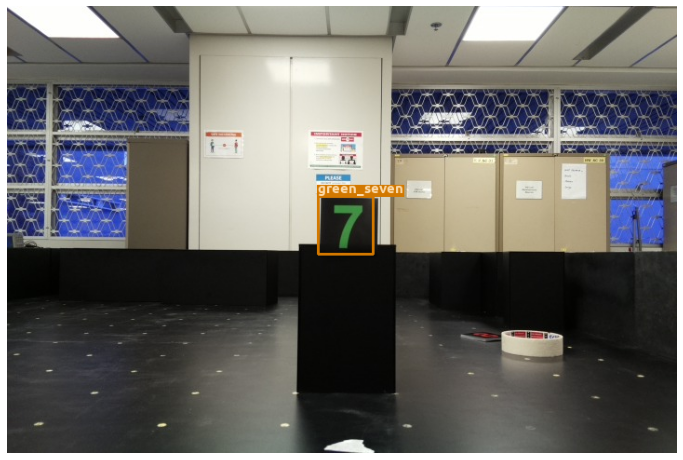

In [7]:
class_name = "green_seven"

img = cv2.imread(f"/Users/adithya/development/mdp-socket/data_processing/new_data/ts/{class_name}_12.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

In [ ]:
for l in LABELS:
    
    img = cv2.imread(f"/Users/adithya/development/mdp-socket/data_processing/new_data/ts/{l}_12.jpg")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    print (l)
    predict(img)
    print()

blue_down
blue_down 0.9636763334274292 135 164

blue_six
blue_six 0.9906664490699768 73 86

blue_y
blue_y 0.9857562184333801 73 81

green_circle
green_circle 0.9978022575378418 114 82

green_seven
green_seven 0.9826131463050842 59 62

green_w
green_w 0.9860365390777588 67 77

red_eight
red_eight 0.9978819489479065 109 93

red_left
red_left 0.9983412027359009 99 74

red_v
red_v 0.9946821928024292 104 85

white_nine
white_nine 0.9941946268081665 52 57

white_up
white_up 0.9718690514564514 56 64

white_x
white_x 0.9947338700294495 92 102

yellow_right
yellow_right 0.990024983882904 137 137

yellow_z
yellow_z 0.9833632707595825 95 80

yellow_zero
yellow_zero 0.9884713888168335 69 96



## Merging Images

In [3]:
images = []

for i, img_path in enumerate(os.listdir("saved_images/")):
    try:
        
        if i==5:
            break
            
        frame = cv2.imread("saved_images/"+img_path)
        
        images.append(frame)
        
    except:
        continue

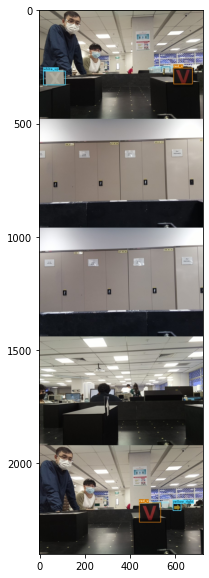

In [17]:
f, ax = plt.subplots(figsize = (15,10))

v_img = cv2.vconcat(images)
plt.imshow(cv2.cvtColor(v_img, cv2.COLOR_BGR2RGB))

In [18]:
cv2.imwrite("joined_image.jpg", v_img)

True